<a href="https://colab.research.google.com/github/davidedifilippo/jupyter_notebooks/blob/main/Carico_Ohmico_Capacitivo_Serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np

#funzione per il disegno dei fasori sul piano complesso

import matplotlib.pyplot as plt
import numpy as np

def complex_plane2(z ,axis_type=0):
    """Creates complex plane and shows complex numbers as vectors (complexors)
    Parameters
    ----------
    z : array of complex values
        array of complex values to be shown
    axis_type : int
        three types of shapes of complex plane:
        0 : symple
        1 : with grid
        2 : moved axis to middle
    -----------------------------------
    # Example
    z=[20+10j,15,-10-10j,5+15j]
    complex_plane2(z,2) """

    w=max(np.abs(z))
    fig, ax = plt.subplots()

    if axis_type==0:
        plt.axis("off")
        plt.text(-0.15*w, 0.8*w, " I m", fontsize=14)
        plt.text( 0.8*w,- 0.15*w, "R e", fontsize=14)
    elif axis_type==1:
        plt.axis("on")
        plt.grid()
        plt.text(-0.15*w, 0.8*w, " Im", fontsize=14)
        plt.text( 0.8*w,- 0.15*w, "Re", fontsize=14)
    else:
        # Move left y-axis and bottom x-axis to centre, passing through (0,0)
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')

        # Eliminate upper and right axes
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Show ticks in the left and lower axes only
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        ax.set_xlabel('                                                 Re []')
        ax.set_ylabel('                                                 Im []')

    plt.xlim(-w, w)
    plt.ylim(-w, w)
    plt.arrow(0, -w, 0, 1.9*w, head_width=w/20, head_length=w/20, fc ='k', ec='k')
    plt.arrow(-w, 0, 1.9*w, 0, head_width=w/20, head_length=w/20, fc = 'k', ec='k')

    for i in range(len(z)):
        fi_a=np.angle(z[i])
        x=z[i].real -abs(w)/ 20*np. cos ( fi_a)
        y=z[i].imag-abs(w) / 20*np. sin (fi_a)
        plt.arrow(0, 0, x, y, head_width=w/20, head_length=w/20, fc = 'b', ec='b')
    plt.show()

Diamo la possibilità di inserire la frequenza di lavoro, la resistenza e la capacità del condensatore:

In [27]:


f = input("Inserire la frequenza di lavoro:")
f = float(f)

VG_max = input("Inserire la tensione di alimentazione:")
VG_max = float(VG_max)

VG_ph = input("Inserire la fase del generatore:")
VG_ph = float(VG_ph)

R = input("Inserire la resistenza:")
R = float(R)

C = input("Inserire la capacità in microfarad:")
C = float(C) * pow(10,-6)

VG = VG_max*(np.cos(VG_ph)+np.sin(VG_ph)*2j)

print("\nTensione di alimentazione: ", np.round(VG, 2))


Inserire la frequenza di lavoro:15910
Inserire la tensione di alimentazione:10
Inserire la fase del generatore:0
Inserire la resistenza:100
Inserire la capacità in microfarad:0.1

Tensione di alimentazione:  (10+0j)


Calcoliamo l'impedenza resistiva, la reattanza capacitivi, e l'impedenza capacitiva

In [28]:
#Impedenza resistiva

ZR = R
print("ZR=", np.round(ZR,2), "Ohm")



ZR= 100.0 Ohm


In [29]:
# Reattanza capacitiva

Xc = 1/(2*np.pi*f*C)

print("Xc=", np.round(Xc,2), "Ohm")

Xc= 100.03 Ohm


In [30]:
#Impedenza capacitiva

Zc = -1j*Xc
print("Zc=", np.round(Zc,2), "Ohm")



Zc= -100.03j Ohm


Poi calcoliamo l'impedenza serie vista dal generatore:


In [32]:
#Impedenza totale vista dal generatore

Zserie = ZR + Zc
print("Zserie=", np.round(Zserie,2), "Ohm")


Zserie= (100-100.03j) Ohm


Si calcola la corrente utilizzando al legge di Ohm generalizzata:

In [34]:
#corrente assorbita dal carico serie:

Ic= VG / Zserie

print("Ic=", np.round(Ic,2), "Ampere")



Ic= (0.05+0.05j) Ampere


Calcoliamo la tensione sul condensatore e sulla resistenza:

In [39]:
#Tensione sul componenti resistivo:

VR = R*Ic

print("VR=", np.round(VR,2), "Volt")



VR= (5+5j) Volt


In [41]:
#Tensione sul componenti capacitivo:

Vc = Zc*Ic

print("Vc=", np.round(Vc,2), "Volt")

Vc= (5-5j) Volt


Disegnamo i fasori sul piano complesso:

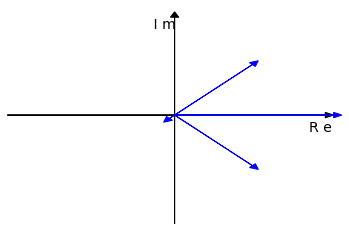

In [42]:
complex_plane2([VG, VR, Vc, Ic])